We will be using **pandas** and **matplotlib** to manipulate our dataset and to visualize the data. First, we need to import both the libraries.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

After importing them, we need to read our csv file datasets. I have collected two datasets from **[Linear Regression Random Dataset](https://www.kaggle.com/datasets/andonians/random-linear-regression)**. These datasets contain very simple random data for a **linear regression** model traning. The dataset contains a train and a test file. We read from both these files.

In [5]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

We can view the top values of these datasets using the **head()** method in pandas. We can also plot these datas using the **matplotlib** library.

   study_time      score
0        24.0  21.549452
1        50.0  47.464463
2        15.0  17.218656
3        38.0  36.586398
4        87.0  87.288984


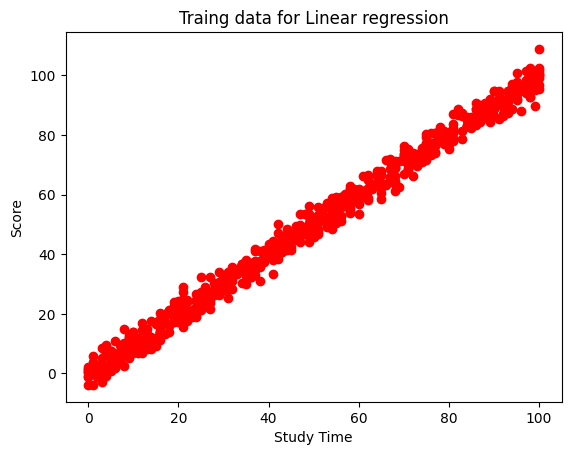

In [6]:
print(train.head())

plt.scatter(train['study_time'], train['score'], color="red")

plt.xlabel('Study Time')
plt.ylabel('Score')
plt.title('Traing data for Linear regression')
plt.show()

   study_time      score
0          77  79.775152
1          21  23.177279
2          22  25.609262
3          20  17.857388
4          36  41.849864


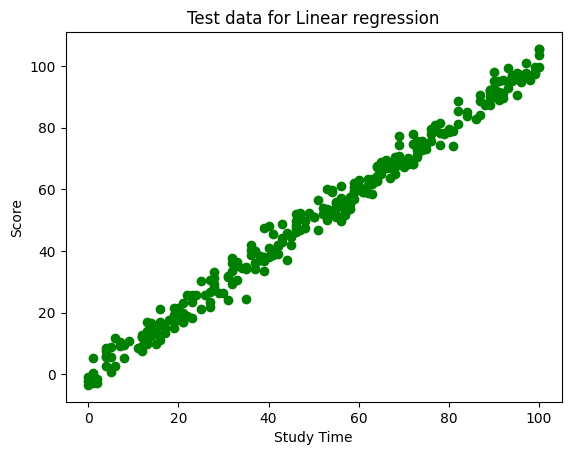

In [7]:
print(test.head())

plt.scatter(test['study_time'], test['score'], color="green")

plt.xlabel('Study Time')
plt.ylabel('Score')
plt.title('Test data for Linear regression')
plt.show()

# **TASK 01**

For this particular **Lab 02**, we are given a **`house_price_data.txt`** file to plot and to use linear regression on that dataset. So first, we will be plotting the given dataset. But first, we need to convert the file into a csv file and then we need to add some headers for the columns. Here, I have added **x**, **y** and **z** headers to the file.

In [5]:
house_price_data = pd.read_csv("house_price_data.csv")
print(house_price_data.head())

      x  y       z
0  2104  3  399900
1  1600  3  329900
2  2400  3  369000
3  1416  2  232000
4  3000  4  539900


# **TASK 02**

Now I will be plotting the dataset.

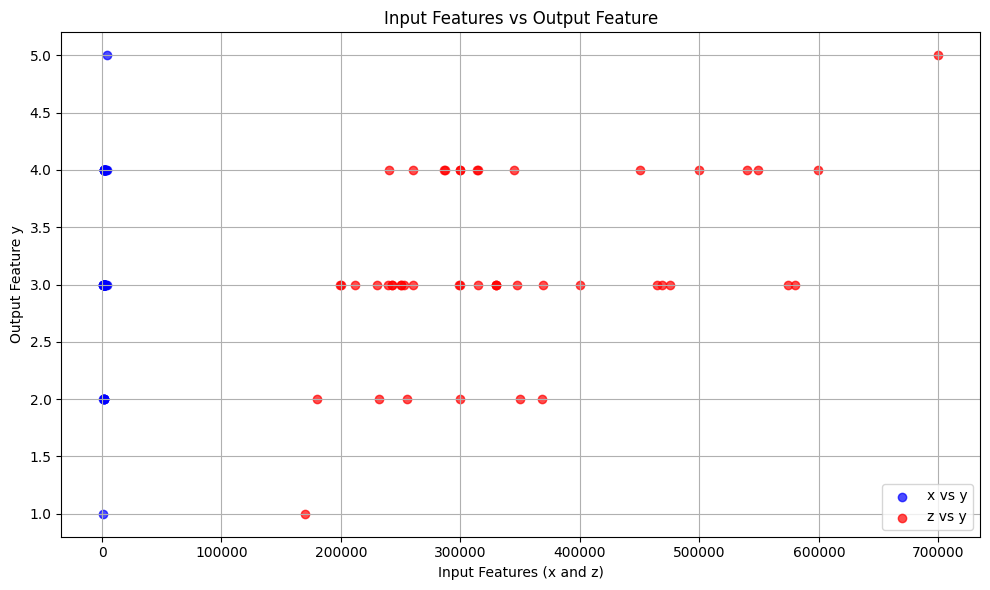

In [6]:
plt.figure(figsize=(10, 6))

# Plot x vs y in blue
plt.scatter(house_price_data['x'], house_price_data['y'], color="blue", label='x vs y', alpha=0.7)

# Plot z vs y in red
plt.scatter(house_price_data['z'], house_price_data['y'], color="red", label='z vs y', alpha=0.7)

plt.xlabel('Input Features (x and z)')
plt.ylabel('Output Feature y')
plt.title('Input Features vs Output Feature')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


# **TASK 03**

Now I need to display the statistical information for each of the input features

In [7]:
print(house_price_data.describe())


                 x          y              z
count    47.000000  47.000000      47.000000
mean   2000.680851   3.170213  340412.659574
std     794.702354   0.760982  125039.899586
min     852.000000   1.000000  169900.000000
25%    1432.000000   3.000000  249900.000000
50%    1888.000000   3.000000  299900.000000
75%    2269.000000   4.000000  384450.000000
max    4478.000000   5.000000  699900.000000


In [8]:
print("Mean:")
print(house_price_data.mean())
print("\nMedian:")
print(house_price_data.median())
print("\nStandard Deviation:")
print(house_price_data.std())
print("\nVariance:")
print(house_price_data.var())


Mean:
x      2000.680851
y         3.170213
z    340412.659574
dtype: float64

Median:
x      1888.0
y         3.0
z    299900.0
dtype: float64

Standard Deviation:
x       794.702354
y         0.760982
z    125039.899586
dtype: float64

Variance:
x    6.315518e+05
y    5.790934e-01
z    1.563498e+10
dtype: float64


# **TASK 04**

Now I need to prepare the dataset by normalizing or scaling the feature set. We will have our Normalization range -1 to 1 or 0 to 1. Normalization helps reduce the time to train a model with a huge variety of data.

In [42]:
from sklearn.preprocessing import MinMaxScaler

features = house_price_data[['x', 'y']]

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler.fit_transform(features)

scaled_house_price_data = pd.DataFrame(scaled_features, columns=['x', 'y'])
print(scaled_house_price_data.head())

          x     y
0  0.345284  0.50
1  0.206288  0.50
2  0.426917  0.50
3  0.155543  0.25
4  0.592388  0.75


# **TASK 05**

Now, we need to split the dataset into train and test sets. We will be using 80% of the dataset as the training set and the rest 20% ase the testing set.

In [43]:
from sklearn.model_selection import train_test_split

X = scaled_house_price_data[['x', 'y']]
y = house_price_data['z']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(37, 2)
(10, 2)
(37,)
(10,)


# **TASK 06**

Now, we need to implemnt the Hypothesis function. The linear regression hypothesis is -> h(x) = θ^T * x

In [44]:
def h(x, theta):
    return np.dot(x, theta)

# **TASK 07**

Now, we implement the Cost function. The cost function measures how far off the predictions are from actual prices.


In [53]:
def cost_function(x, y, theta):
    y_length = len(y)
    dot_predictions = h(x, theta)
    squared_errors = (dot_predictions - y) ** 2

    return np.sum(squared_errors) / (2 * y_length)



theta = np.array((0, 0 ), dtype=np.float64)

cost = cost_function(X, y, theta)
print(cost)

0.07899053842917522


# **TASK 08**

Gradient descent is used to adjust the parameters so that the cost function decreases.

In [56]:
def gradient_descent(x, y, theta, learning_rate=0.1, num_epochs=10):
    y_length = len(y)
    cost_history = []

    X = np.column_stack((np.ones(y_length), x))

    if theta.shape != (X.shape[1],):
        theta = np.zeros(X.shape[1])

    for _ in range(num_epochs):

        predictions = h(X, theta)

        gradients = (1/y_length) * X.T.dot(predictions - y)

        theta = theta - learning_rate * gradients

        cost = cost_function(X, y, theta)
        cost_history.append(cost)

    return theta, cost_history

# **TASK 09**

We use 50 epochs for the gradient descent function.

In [58]:
theta, cost_history = gradient_descent(X_train, y_train, theta, learning_rate=0.01, num_epochs=50)
print(theta)
print(cost_history)

[0.15061673 0.08172605 0.0974283 ]
[0.029548764080126237, 0.029232292292330132, 0.02892432416057147, 0.02862462410338253, 0.028332963072333635, 0.028049118370855535, 0.027772873478086386, 0.027504017877603808, 0.02724234689090673, 0.02698766151551516, 0.02673976826755986, 0.0264984790287374, 0.026263610897509608, 0.02603498604442957, 0.025812431571479787, 0.02559577937531136, 0.025384866014275736, 0.025179532579144202, 0.02497962456741244, 0.024784991761091106, 0.024595488107885526, 0.024410971605670552, 0.02423130419016929, 0.024056351625746736, 0.02388598339923197, 0.023720072616685, 0.023558495903026465, 0.02340113330445085, 0.023247868193546115, 0.023098587177044515, 0.022953180006131717, 0.022811539489243388, 0.02267356140728002, 0.022539144431173143, 0.022408190041737608, 0.02228060245174659, 0.022156288530167635, 0.02203515772849985, 0.021917122009153883, 0.021802095775818254, 0.021689995805756635, 0.021580741183982843, 0.0214742532392612, 0.0213704554818819, 0.02126927354316189

# **TASK 10**

Next we create a scatter plot to display the actual house prices (as blue dots) based on their sizes on the x-axis. I then add a red line that shows the predicted prices from my linear regression model.

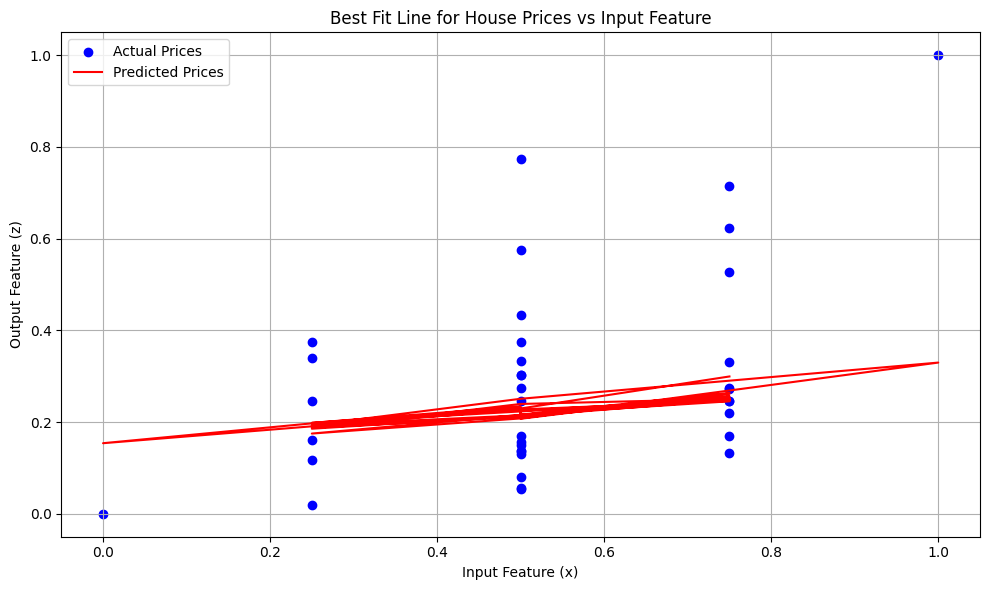

In [60]:
plt.figure(figsize=(10, 6))

# Access the second column of X_train using .iloc
plt.scatter(X_train.iloc[:, 1], y_train, color='blue', label='Actual Prices')

y_pred = h(np.column_stack((np.ones(len(X_train)), X_train)), theta)

plt.plot(X_train.iloc[:, 1], y_pred, color='red', label='Predicted Prices')

plt.xlabel('Input Feature (x)')
plt.ylabel('Output Feature (z)')
plt.title('Best Fit Line for House Prices vs Input Feature')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# **TASK 11**

A graph between the cost function vs Epochs

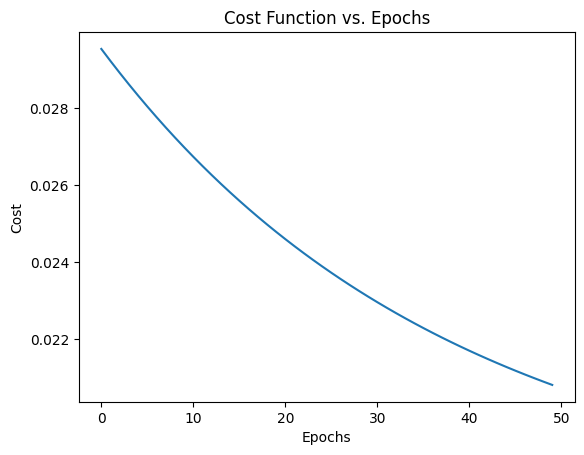

In [61]:
# prompt: Plot graph of cost function vs. epoch.

plt.plot(range(len(cost_history)), cost_history)
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.title("Cost Function vs. Epochs")
plt.show()


# **TASK 12**

Now we use the skleran library to implement the final Linear Regression model.

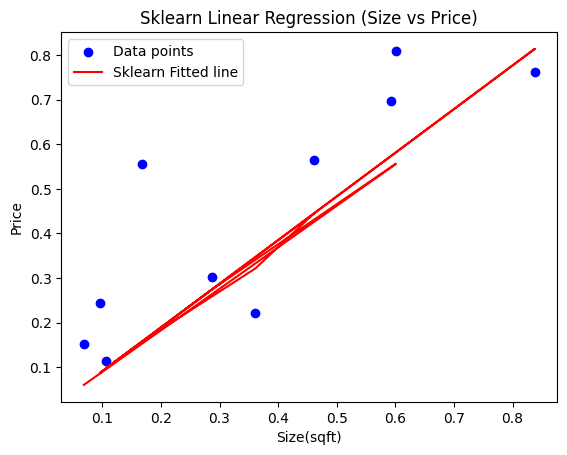

In [66]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

model = LinearRegression()
model.fit(X_train, y_train)
y_pred_sklearn = model.predict(X_test)

plt.scatter(X_test['x'], y_test, color='blue', label='Data points')

plt.plot(X_test['x'], y_pred_sklearn, color='red', label='Sklearn Fitted line')
plt.xlabel('Size(sqft)')
plt.ylabel('Price')
plt.title('Sklearn Linear Regression (Size vs Price)')
plt.legend()
plt.show()